In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
dataset=pd.read_csv('/content/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
print(dataset.shape)

(20640, 10)


In [35]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

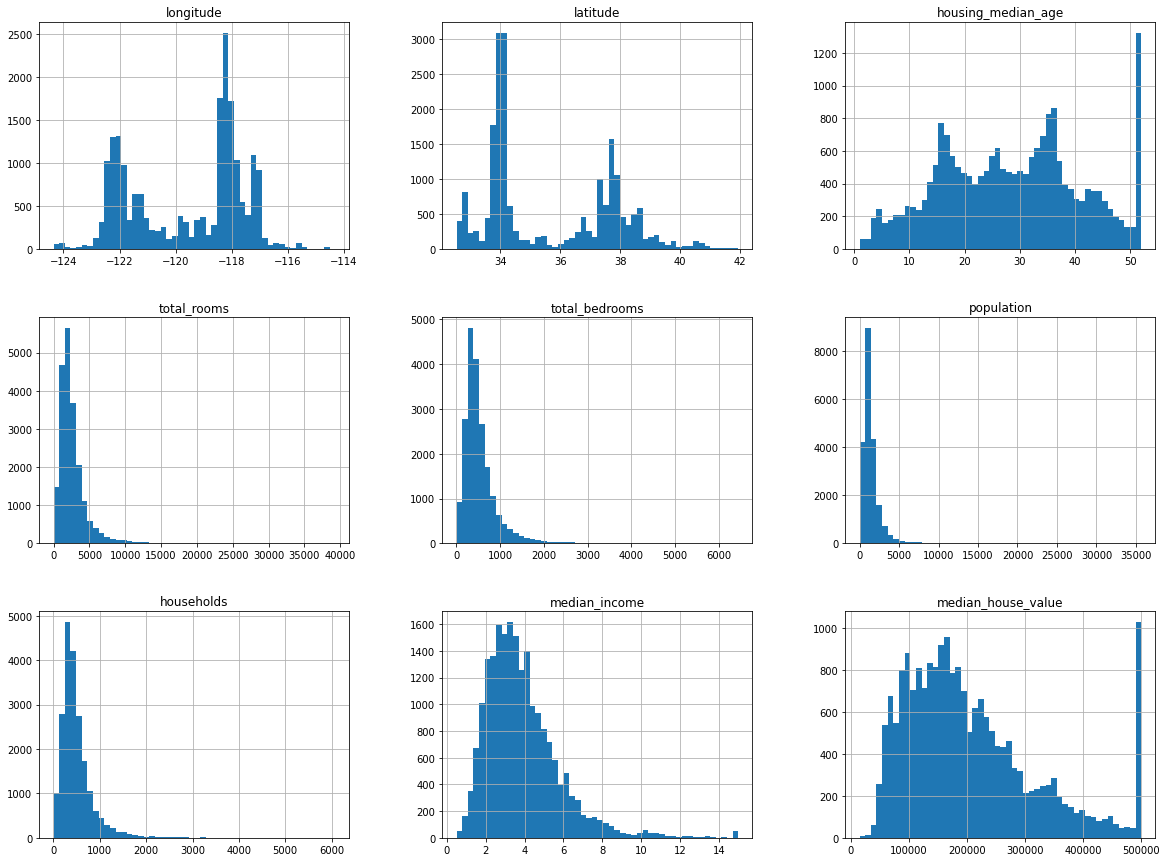

In [37]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [38]:
train_data, test_data= train_test_split(dataset, test_size=0.20, random_state=0)

In [42]:
print(train_data.shape)

(16512, 10)


In [43]:
print(test_data.shape)

(4128, 10)


In [56]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [62]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]

In [63]:
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]

In [64]:
dataset["population_per_household"] = dataset["population"]/dataset["households"]

In [65]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [66]:
dataset= strat_train_set.drop("median_house_value", axis=1)
dataset_labels = strat_train_set["median_house_value"].copy()

In [68]:
imputer = SimpleImputer(strategy="median")
housing_num = dataset.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [69]:
imputer.statistics_
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  436.    , 1167.    ,
        410.    ,    3.5343])

In [70]:
X = imputer.transform(housing_num)

In [72]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [75]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_tr)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
cat_encoder.categories_

[array([-124.35, -124.3 , -124.27, -124.25, -124.23, -124.22, -124.21,
        -124.19, -124.18, -124.17, -124.16, -124.15, -124.14, -124.13,
        -124.11, -124.1 , -124.09, -124.08, -124.07, -124.06, -124.05,
        -124.03, -124.02, -124.  , -123.98, -123.96, -123.92, -123.88,
        -123.85, -123.84, -123.83, -123.82, -123.81, -123.8 , -123.79,
        -123.78, -123.76, -123.75, -123.74, -123.73, -123.72, -123.71,
        -123.7 , -123.69, -123.68, -123.66, -123.64, -123.63, -123.59,
        -123.54, -123.53, -123.52, -123.5 , -123.49, -123.48, -123.47,
        -123.43, -123.41, -123.4 , -123.38, -123.36, -123.35, -123.34,
        -123.32, -123.28, -123.25, -123.24, -123.23, -123.22, -123.21,
        -123.2 , -123.19, -123.18, -123.17, -123.16, -123.15, -123.13,
        -123.12, -123.11, -123.1 , -123.08, -123.07, -123.03, -123.02,
        -123.01, -123.  , -122.99, -122.97, -122.96, -122.95, -122.94,
        -122.93, -122.92, -122.91, -122.9 , -122.89, -122.88, -122.87,
      

In [79]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     
     def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
     
     def fit(self, X, y = None):
        return self 
     
     def transform(self, X, y = None):
          rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
          population_per_household = X[:, population_ix] / X[:, households_ix]
          if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
          else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(dataset.values)

In [80]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,columns=list(dataset.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,<1H OCEAN,5.446154,2.562238
1,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,<1H OCEAN,4.136247,2.303342
2,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,NEAR BAY,3.219139,2.021053
3,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,INLAND,5.528095,2.712381
4,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,INLAND,5.916817,2.652803


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.65044886,  1.3366276 , -0.12821464, ...,  0.0083221 ,
        -0.04696513, -0.2292273 ],
       [ 0.6101325 , -0.7499318 ,  1.62466495, ..., -0.53552899,
        -0.07066637,  0.26508551],
       [-1.4258878 ,  1.01381909,  1.86369398, ..., -0.91629663,
        -0.09650921,  1.78786516],
       ...,
       [-1.20631698,  0.74715118,  1.38563591, ...,  0.09886509,
        -0.08990375, -0.3863338 ],
       [ 0.7398789 , -0.81542918, -0.20789099, ...,  0.02237445,
         0.02839822, -0.54696048],
       [ 0.68997644, -0.85285626,  0.11081439, ..., -0.61012165,
         0.10943301,  1.00222509]])

In [83]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(dataset)
housing_prepared.shape

(16512, 16)

In [84]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, dataset_labels)

LinearRegression()

In [85]:
some_data = dataset.iloc[:5] 
some_labels = dataset_labels.iloc[:5] 
some_data_prepared = full_pipeline.transform(some_data)  
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [227885.17864683 199641.86684096 250266.3411042  236655.89283764
  11125.78759882]


In [86]:
print("Labels:", list(some_labels))

Labels: [187800.0, 136600.0, 400000.0, 106300.0, 43500.0]


In [87]:
from sklearn.metrics import mean_squared_error  

housing_predictions = lin_reg.predict(housing_prepared) 
lin_mse = mean_squared_error(dataset_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

68286.41923036716

In [89]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=50)
forest_reg.fit(housing_prepared, dataset_labels)

RandomForestRegressor(random_state=50)

In [90]:
housing_predictions = forest_reg.predict(housing_prepared) 
forest_mse = mean_squared_error(dataset_labels, housing_predictions) 
forest_rmse = np.sqrt(forest_mse) 
forest_rmse

18541.510295026026

In [92]:
#Support Vector Machine

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, dataset_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(dataset_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110752.11963123486